Missing values per column before filling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing values per column after filling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Sample of cleaned data:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True 

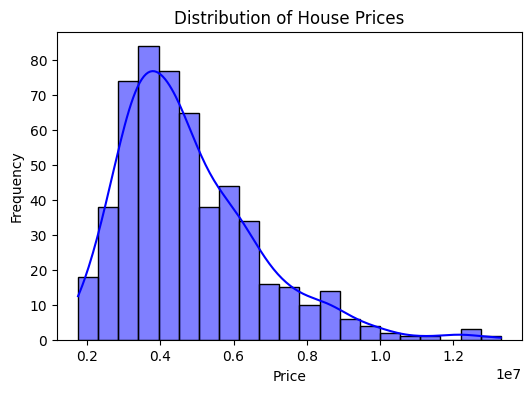

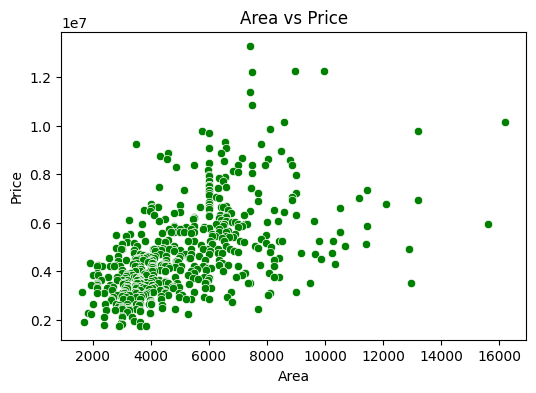

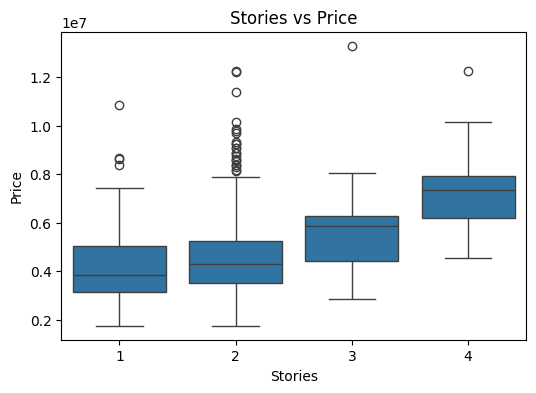

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Housing.csv')

# Step 1: Check for missing values
print("Missing values per column before filling:")
print(df.isnull().sum())

# Step 2: Handle missing values
# Fill missing values for numerical columns with the column mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify missing values have been handled
print("\nMissing values per column after filling:")
print(df.isnull().sum())

# Step 3: Convert categorical columns using One-Hot Encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the cleaned dataset
print("\nSample of cleaned data:")
print(df.head())

# Step 4: Data visualization

# Plot the distribution of house prices
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
print("\n")
# Scatter plot of Area vs. Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='price', data=df, color='green')
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()
print("\n")
# Boxplot of stories vs price to show the relationship between these categories
plt.figure(figsize=(6, 4))
sns.boxplot(x='stories', y='price', data=df)
plt.title('Stories vs Price')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.show()


In [10]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Normalize/Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled features
print("Scaled Features Sample:")
print(X_scaled[:5])


Scaled Features Sample:
[[ 1.04672629  1.40341936  1.42181174  1.37821692  1.51769249  0.40562287
  -0.46531479 -0.73453933 -0.2192645   1.4726183   1.80494113 -0.84488844
  -0.6964292 ]
 [ 1.75700953  1.40341936  5.40580863  2.53202371  2.67940935  0.40562287
  -0.46531479 -0.73453933 -0.2192645   1.4726183  -0.55403469 -0.84488844
  -0.6964292 ]
 [ 2.21823241  0.04727831  1.42181174  0.22441013  1.51769249  0.40562287
  -0.46531479  1.3613975  -0.2192645  -0.67906259  1.80494113  1.18358821
  -0.6964292 ]
 [ 1.08362412  1.40341936  1.42181174  0.22441013  2.67940935  0.40562287
  -0.46531479  1.3613975  -0.2192645   1.4726183   1.80494113 -0.84488844
  -0.6964292 ]
 [ 1.04672629  1.40341936 -0.57018671  0.22441013  1.51769249  0.40562287
   2.14908276  1.3613975  -0.2192645   1.4726183  -0.55403469 -0.84488844
  -0.6964292 ]]


In [38]:
# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=40)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


Linear Regression MSE: 1580038158309.6890
Linear Regression MAE: 904174.0611
Linear Regression R²: 0.7095


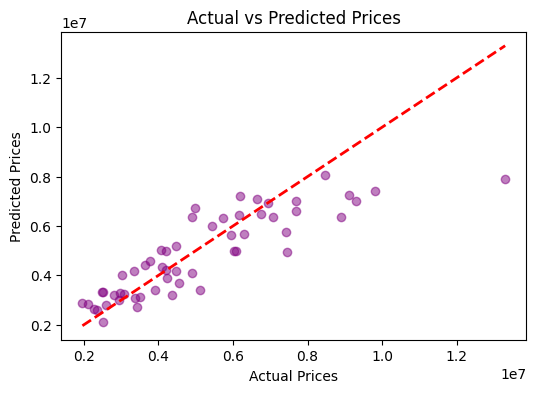

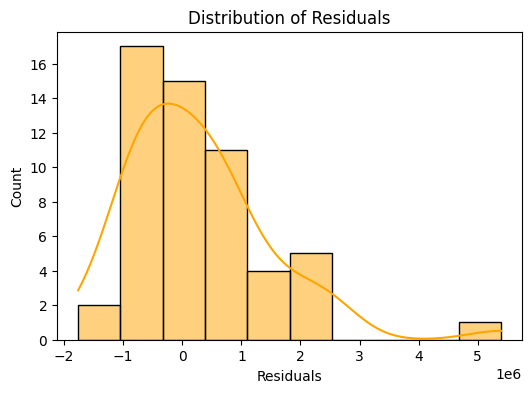

In [39]:
# Model Evaluation and Fine-Tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Linear Regression MAE: {mae_lr:.4f}")
print(f"Linear Regression R²: {r2_lr:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
print("\n")
# Plot residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()
